In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from datetime import datetime
from datetime import timedelta
from arch import arch_model

In [2]:
df=pd.read_csv("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Temp prediction\\MIDLAND TEXAS, TX US.csv")
df['DATE']=pd.to_datetime(df['DATE'],format="%Y-%m-%d")
df=df.set_index('DATE')
df['TCELCIUS']=(df['TAVG']-32)*5/9
df=df.drop(columns=['TMAX','TMIN','STATION','TAVG'])
df = df.asfreq(pd.infer_freq(df.index))
df=df.resample('M').mean()

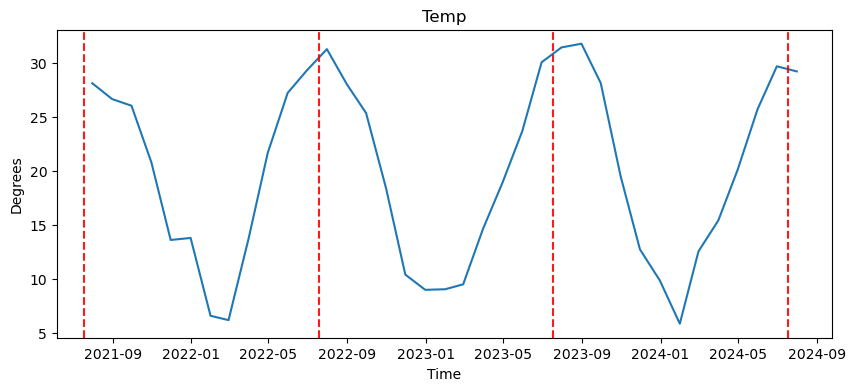

In [3]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title('Temp')
plt.xlabel('Time')
plt.ylabel('Degrees')
for year in range(2021,2025):
    plt.axvline(pd.to_datetime(str(year)+'-07-18'),color='r', linestyle='--', alpha=0.9)
plt.show()

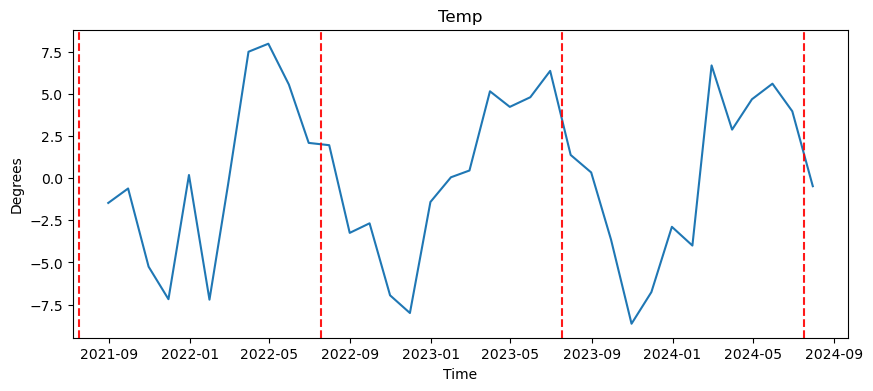

In [4]:
first_diff=df.diff()[1:]


plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Temp')
plt.xlabel('Time')
plt.ylabel('Degrees')
for year in range(2021,2025):
    plt.axvline(pd.to_datetime(str(year)+'-07-18'),color='r', linestyle='--', alpha=0.9)
plt.show()

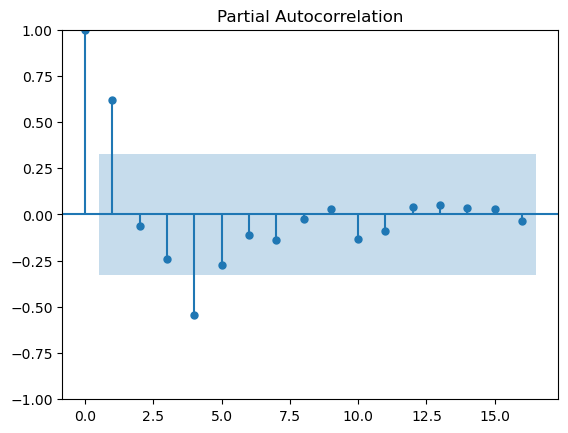

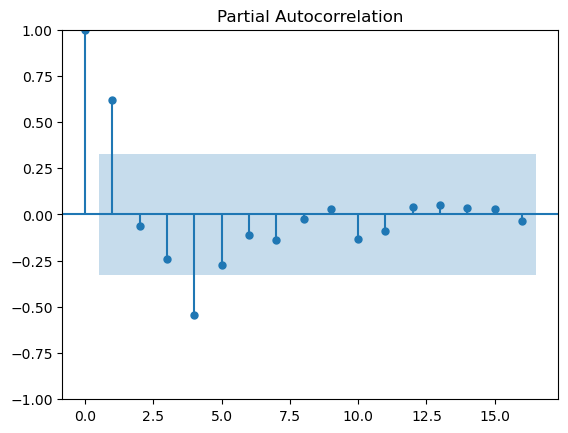

In [5]:
plot_pacf(first_diff)

p=4

In [6]:
train_end=datetime(2024,1,31)
test_end=datetime(2024,7,31)

train_data=first_diff[:train_end + timedelta(days=1)]
test_data=first_diff[train_end+timedelta(days=1):]

In [7]:
model=arch_model(train_data,p=1,q=1)
model_fit=model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 106.58189728272983
Iteration:      2,   Func. Count:     13,   Neg. LLF: 89.28313319142362
Iteration:      3,   Func. Count:     18,   Neg. LLF: 89.28248956810455
Iteration:      4,   Func. Count:     23,   Neg. LLF: 89.28248579245115
Iteration:      5,   Func. Count:     28,   Neg. LLF: 89.28248091171935
Iteration:      6,   Func. Count:     33,   Neg. LLF: 89.28246198987202
Iteration:      7,   Func. Count:     38,   Neg. LLF: 89.28241798279065
Iteration:      8,   Func. Count:     43,   Neg. LLF: 89.28229969085777
Iteration:      9,   Func. Count:     48,   Neg. LLF: 89.28198602022927
Iteration:     10,   Func. Count:     53,   Neg. LLF: 89.28115815445956
Iteration:     11,   Func. Count:     58,   Neg. LLF: 89.27980912922135
Iteration:     12,   Func. Count:     63,   Neg. LLF: 89.27854784423126
Iteration:     13,   Func. Count:     68,   Neg. LLF: 89.27717537133559
Iteration:     14,   Func. Count:     73,   Neg. LLF: 89.277521

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               TCELCIUS   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -89.2768
Distribution:                  Normal   AIC:                           186.554
Method:            Maximum Likelihood   BIC:                           192.158
                                        No. Observations:                   30
Date:                Mon, Jul 22 2024   Df Residuals:                       29
Time:                        19:29:39   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.7475      0.877     -0.852      0.394 [ -2.467,  0.972]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.2992      5.914      1.065      0.287      [ -5.291, 17.889]
alpha[1]   1.1929e-15  1.102e-02  1.082e-13      1.000 [-2.161e-02,2.161e-02]
beta[1]        0.7303      0.274      2.664  7.721e-03      [  0.193,  1.268]
=============================================================================

Covariance estimator: robust
"""

In [8]:
predictions = model_fit.forecast(horizon=len(test_data))

forecast_variances = np.sqrt(predictions.variance.values[-1, :])
forecast_index = pd.date_range(start=test_data.index[0], end=test_data.index[-1], freq='M')

forecast_df = pd.DataFrame(data=forecast_variances, index=forecast_index, columns=['Forecasted Variance'])

print(forecast_df)

            Forecasted Variance
2024-02-29             4.833217
2024-03-31             4.833219
2024-04-30             4.833221
2024-05-31             4.833222
2024-06-30             4.833222
2024-07-31             4.833223


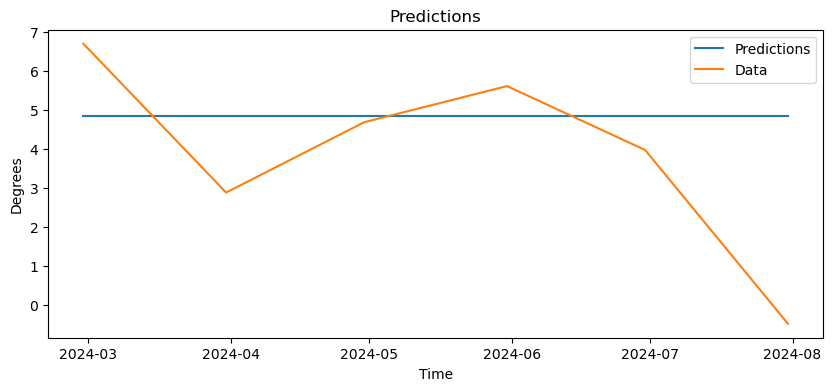

In [9]:
plt.figure(figsize=(10,4))
plt.plot(forecast_df, label='Predictions')
plt.plot(test_data, label='Data')
plt.title('Predictions')
plt.xlabel('Time')
plt.ylabel('Degrees')
plt.legend()
plt.show()

## ROLLING

In [10]:
rolling_predictions=[]
for i in test_data.index:
    train_data=first_diff[:i]
    model=arch_model(train_data,p=1,q=1)
    model_fit=model.fit()
    predictions=model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(predictions.variance.values[0]))

Iteration:      1,   Func. Count:      6,   Neg. LLF: 111.0738387748133
Iteration:      2,   Func. Count:     13,   Neg. LLF: 92.92171037245781
Iteration:      3,   Func. Count:     18,   Neg. LLF: 92.9215381428744
Iteration:      4,   Func. Count:     23,   Neg. LLF: 92.92153267627825
Iteration:      5,   Func. Count:     28,   Neg. LLF: 92.92149500913277
Iteration:      6,   Func. Count:     33,   Neg. LLF: 92.92130893017213
Iteration:      7,   Func. Count:     38,   Neg. LLF: 92.92100256909174
Iteration:      8,   Func. Count:     43,   Neg. LLF: 92.92003210821146
Iteration:      9,   Func. Count:     48,   Neg. LLF: 92.91786338054129
Iteration:     10,   Func. Count:     53,   Neg. LLF: 92.91494955162828
Iteration:     11,   Func. Count:     58,   Neg. LLF: 92.91267290926956
Iteration:     12,   Func. Count:     63,   Neg. LLF: 92.9121284124261
Iteration:     13,   Func. Count:     68,   Neg. LLF: 92.91205955936441
Iteration:     14,   Func. Count:     73,   Neg. LLF: 92.912007525

In [11]:
rolling_predictions_index = pd.date_range(start=test_data.index[0], end=test_data.index[-1], freq='M')
rolling_predictions_df=pd.DataFrame(data=rolling_predictions,index=rolling_predictions_index, columns=['Predictions'])

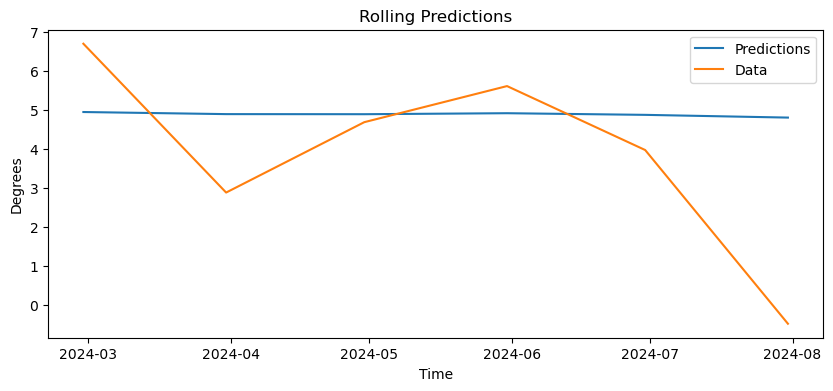

In [12]:
plt.figure(figsize=(10,4))
plt.plot(rolling_predictions_df['Predictions'], label='Predictions')
plt.plot(test_data, label='Data')
plt.title('Rolling Predictions')
plt.ylabel('Degrees')
plt.xlabel('Time')
plt.legend()
plt.show()